In [1]:
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
files = glob.glob("../Dataset/label/*multi_GOES*Partition*")

In [3]:
df = pd.read_csv(files[0])

In [4]:
df_tot = pd.DataFrame([])
for file in files:
    df = pd.read_csv(file)
    df_tot = pd.concat([df_tot, df])
    

In [5]:
df_tot['Timestamp'] = pd.to_datetime(df_tot['Timestamp'], format = '%Y-%m-%d %H:%M:%S')

In [6]:
p1 = df_tot.loc[df_tot['Timestamp'].dt.month.isin([1, 2, 3]), ['Label', 'Timestamp']]

In [7]:
len(df_tot)

105965

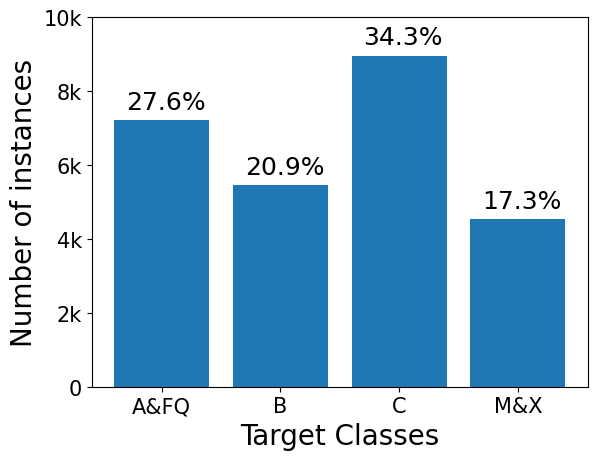

In [45]:
plt.rcParams.update({
    "font.family": "serif",
    "font.serif": "Times New Roman",})

# define table which shows the number of instances of each class 
bar_table = p1.groupby(by=['Label']).count()

# set matplotlib para
plt.bar(x=bar_table.index, height=bar_table['Timestamp'])
plt.xticks(ticks=[0,1,2,3], labels=['A&FQ', 'B', 'C', 'M&X'], fontsize=15)
plt.yticks(ticks=[0, 2000, 4000, 6000, 8000, 10000], labels=[0, '2k', '4k', '6k', '8k', '10k'] ,fontsize=15)
plt.ylabel(r'Number of instances', fontsize = 20)
plt.xlabel('Target Classes', fontsize = 20)

for i in range(len(bar_table)):
    plt.text(i-0.3, 300+bar_table['Timestamp'][i], f"{bar_table['Timestamp'][i]/len(df)*100:.1f}%", fontsize=18)

plt.savefig("distribution_of_targetvalues.pdf", dpi=300, bbox_inches='tight')
plt.show()